**EDA for Diabetes Data**

*Data Analyst*
- 1. Are there any null values, outliers or duplicated values? How will you wrangle/handle them?
- 2. Are there any variables that warrant transformations?
- 3. Do you notice any patterns or anomalies in the data? Can you plot them?

*Data Statistic*
- 1. Show Distribution of Age
- 2. Show Distribution of BMI
- 3. Show the youngest age to get diabetes
- 4. Average BMI to get Diabetes
- 5. Average Age to get Diabetes
- 6. Total People get Diabetes
- 7. Show Correlation Map

*Data Visualization*

Will be showing in Power BI

# Import Library

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Show Null Values

In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**There is no null values**

# Show Duplicated Values

In [19]:
df.duplicated().sum()

0

# Showing Outlier

In [20]:
remove_columns = ['Outcome']
df_outlier = df.drop(columns=remove_columns)
df_outlier.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

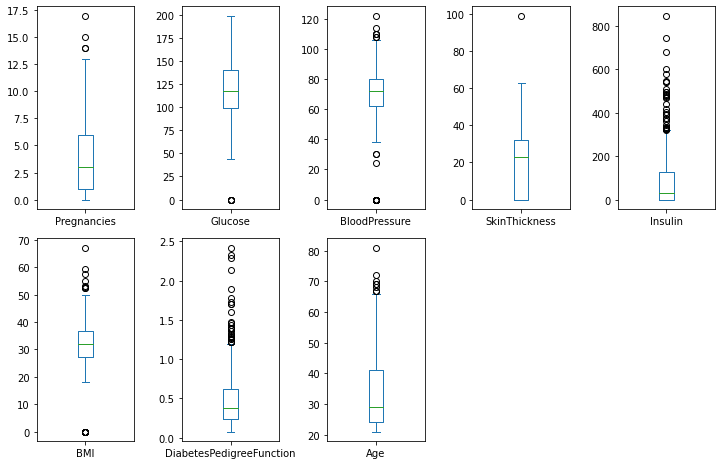

In [21]:
df_outlier.plot(subplots=True, layout=(5,5), kind='box', figsize=(10,16))
plt.tight_layout()

**Terdapat beberapa Outlier yang perlu digantikan dengan nilai median (Contoh Pregnancies, Skin Thickness, Age, Glucose)**

In [22]:
deals_median = df_outlier['Pregnancies'].median()
Q1 = df_outlier['Pregnancies'].quantile(0.25)

Q3 = df_outlier['Pregnancies'].quantile(0.75)

IQR = Q3 - Q1

deals_outlier = Q3 + 1.5*IQR

In [24]:
df['Pregnancies'] = np.where(df['Pregnancies'] >deals_outlier, deals_median,df['Pregnancies'])

In [25]:
deals_median = df_outlier['Glucose'].median()
Q1 = df_outlier['Glucose'].quantile(0.25)

Q3 = df_outlier['Glucose'].quantile(0.75)

IQR = Q3 - Q1

deals_outlier = Q3 + 1.5*IQR

In [26]:
df['Glucose'] = np.where(df['Glucose'] >deals_outlier, deals_median,df['Glucose'])

In [28]:
deals_median = df_outlier['SkinThickness'].median()
Q1 = df_outlier['SkinThickness'].quantile(0.25)

Q3 = df_outlier['SkinThickness'].quantile(0.75)

IQR = Q3 - Q1

deals_outlier = Q3 + 1.5*IQR

In [29]:
df['SkinThickness'] = np.where(df['SkinThickness'] >deals_outlier, deals_median,df['SkinThickness'])

In [30]:
deals_median = df_outlier['Age'].median()
Q1 = df_outlier['Age'].quantile(0.25)

Q3 = df_outlier['Age'].quantile(0.75)

IQR = Q3 - Q1

deals_outlier = Q3 + 1.5*IQR

In [31]:
df['Age'] = np.where(df['Age'] >deals_outlier, deals_median,df['Age'])

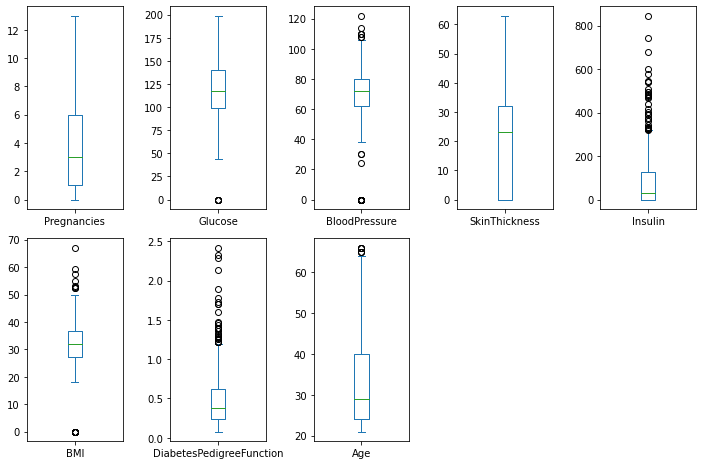

In [33]:
df_outlier_cleaned = df.drop(columns=remove_columns)

df_outlier_cleaned.plot(subplots=True, layout=(5,5), kind='box', figsize=(10,16))
plt.tight_layout()

**Beberapa Data Sudah Direplace Dengan Median**

**Jawaban Nomor (1) Tidak ada null values, terdapat beberapa outlier, dan tidak ada data yang terduplikasi**

**Jawaban Nomor (2) Transformasi data sudah dilakukan yaitu pada kolom outcome dari Yes/No menjadi 1/0**

In [35]:
df_outlier_cleaned['Outcome'] = df['Outcome']

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

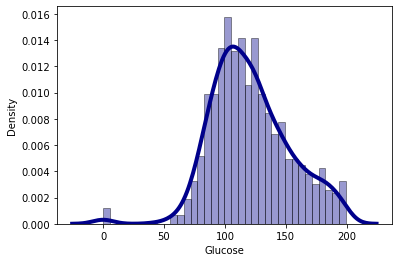

In [40]:
sns.distplot(df_outlier_cleaned['Glucose'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

- Kadar gula darah pada pasien dinilai normal jika masih di bawah **100 mg/dL**, dan prediabetes jika kadarnya antara **100 hingga 125 mg/dL**. Pasien dalam kondisi DM tipe 2 jika kadar GDP di atas **126 mg/dL**.
Pada data tersebut banyak pasien yang glukosa diatas Normal.

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

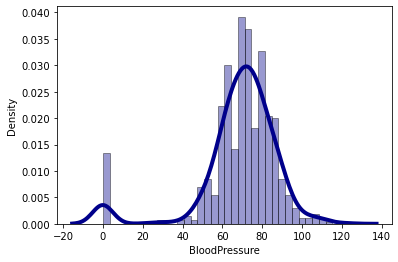

In [44]:
sns.distplot(df_outlier_cleaned['BloodPressure'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

- Blood Pressure normal pada manusia sekitar **120/80 mmHg**. Pada data tersebut terlihat tekanan darah banyak yang kurang dari 80

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

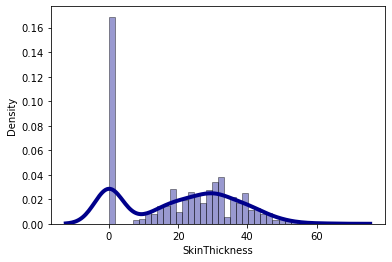

In [45]:
sns.distplot(df_outlier_cleaned['SkinThickness'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

- Skin Thickness orang Normal berada pada range **17-21**. Pada data tersebut banyak pasien skin thickness **diatas normal** karena menderita diabetes.

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

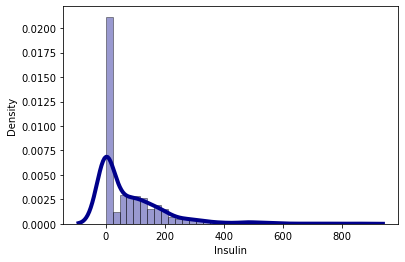

In [46]:
sns.distplot(df_outlier_cleaned['Insulin'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

- Insulin pada orang normal berada dibawah **200**, apabila diatas 200 maka kemungkinan menderita **diabetes**.

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

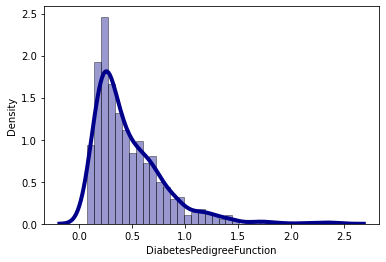

In [47]:
sns.distplot(df_outlier_cleaned['DiabetesPedigreeFunction'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

- DiabetesPedigreeFunction adalah probabilitas keturunan dari penderita diabetes, apabila diatas 0.5 maka kemungkinan besar pasien tersebut terkena diabetes juga

**Jawaban nomor (3) banyak pasien yang mempunyai Glukosa, Blood Pressure, Skin Thickness, Insulin, serta riwayat Diabetes diatas normal**

# Data Visualization

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

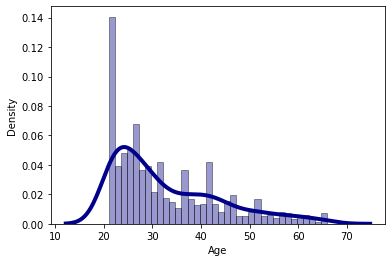

In [48]:
sns.distplot(df_outlier_cleaned['Age'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

- Distribusi umur dari data tersebut paling banyak di **20-30 tahun**

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

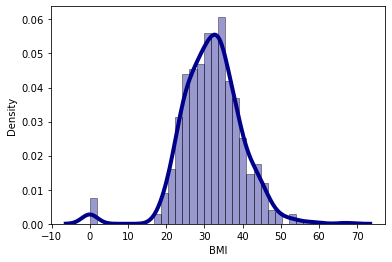

In [49]:
sns.distplot(df_outlier_cleaned['BMI'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

- BMI orang normal berada pada **18-25**, pada data tersebut banyak sekali pasien dengan BMI **diatas 25**.

In [50]:
df_outlier_cleaned.groupby(['Outcome'])['Age'].min()

Outcome
0    21.0
1    21.0
Name: Age, dtype: float64

- Pasien termuda yaitu umur **21 Tahun !!**

In [57]:
df2=df_outlier_cleaned.loc[(df_outlier_cleaned['Age'] == 21) & (df_outlier_cleaned['Outcome'] == 1)]
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
220,0.0,177.0,60,29.0,478,34.6,1.072,21.0,1
255,1.0,113.0,64,35.0,0,33.6,0.543,21.0,1
414,0.0,138.0,60,35.0,167,34.6,0.534,21.0,1
577,2.0,118.0,80,0.0,0,42.9,0.693,21.0,1
580,0.0,151.0,90,46.0,0,42.1,0.371,21.0,1


- Ada **5** Pasien termuda penderita Diabetes.

In [64]:
df_bmi = df.loc[(df_outlier_cleaned['Outcome']==1)]
df_bmi['BMI'].mean()

35.14253731343278

- Rata rata BMI dari pasien diabetes adalah **35.14**

In [65]:
df_age = df.loc[(df_outlier_cleaned['Outcome']==1)]
df_age['Age'].mean()

36.77238805970149

- Rata rata Umur dari pasien diabetes adalah **36.77**

In [70]:
df_count_diabetes = df.loc[(df_outlier_cleaned['Outcome']==1)]
df_count_diabetes['Outcome'].sum()

268

- Total Pasien adalah **268** dari **767** Pasien

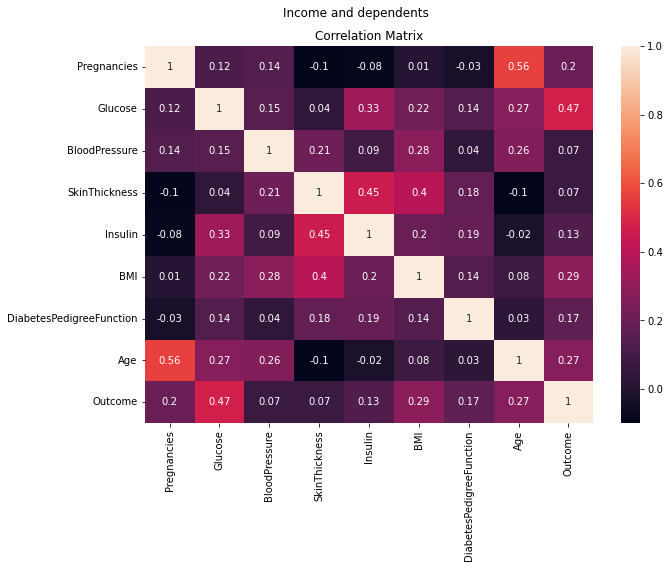

In [79]:
df_correlation_matrix = pd.DataFrame(df_outlier_cleaned)

plt.figure(figsize=(10,8))
sns.heatmap(df_correlation_matrix.corr().round(2), annot=True)
plt.title('Correlation Matrix')
plt.suptitle('Income and dependents')
plt.tight_layout()

- Pada correlation matrix, yang paling mempengaruhi seseorang untuk menjadi penderita diabetes adalah **Glukosa**, sementara faktor lain yang mempengaruhi adalah **BMI dan Umur**

# Machine Learning

In [80]:
X = df_outlier_cleaned.drop(['Outcome'],axis = 1)
Y = df_outlier_cleaned['Outcome']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

# Decision Tree Classification

In [82]:
from sklearn import tree
df_decision_tree = tree.DecisionTreeClassifier(ccp_alpha=0.01)#build
df_decision_tree.fit(X_train,Y_train)#train
df_decision_tree.score(X_test,Y_test)#predict

y_pred = df_decision_tree.predict(X_test)
df_decision_tree.score(X_test,Y_test)

0.7316017316017316

In [83]:
y_pred = df_decision_tree.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[141,  16],
       [ 46,  28]], dtype=int64)

In [13]:
feature_names = X.columns
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [14]:
from sklearn.tree import export_graphviz
export_graphviz(df_decision_tree, out_file="Decision_Tree_Survived.dot", class_names=["Not Diabetes","Diabetes"],
               feature_names=feature_names, impurity=False, filled=True)

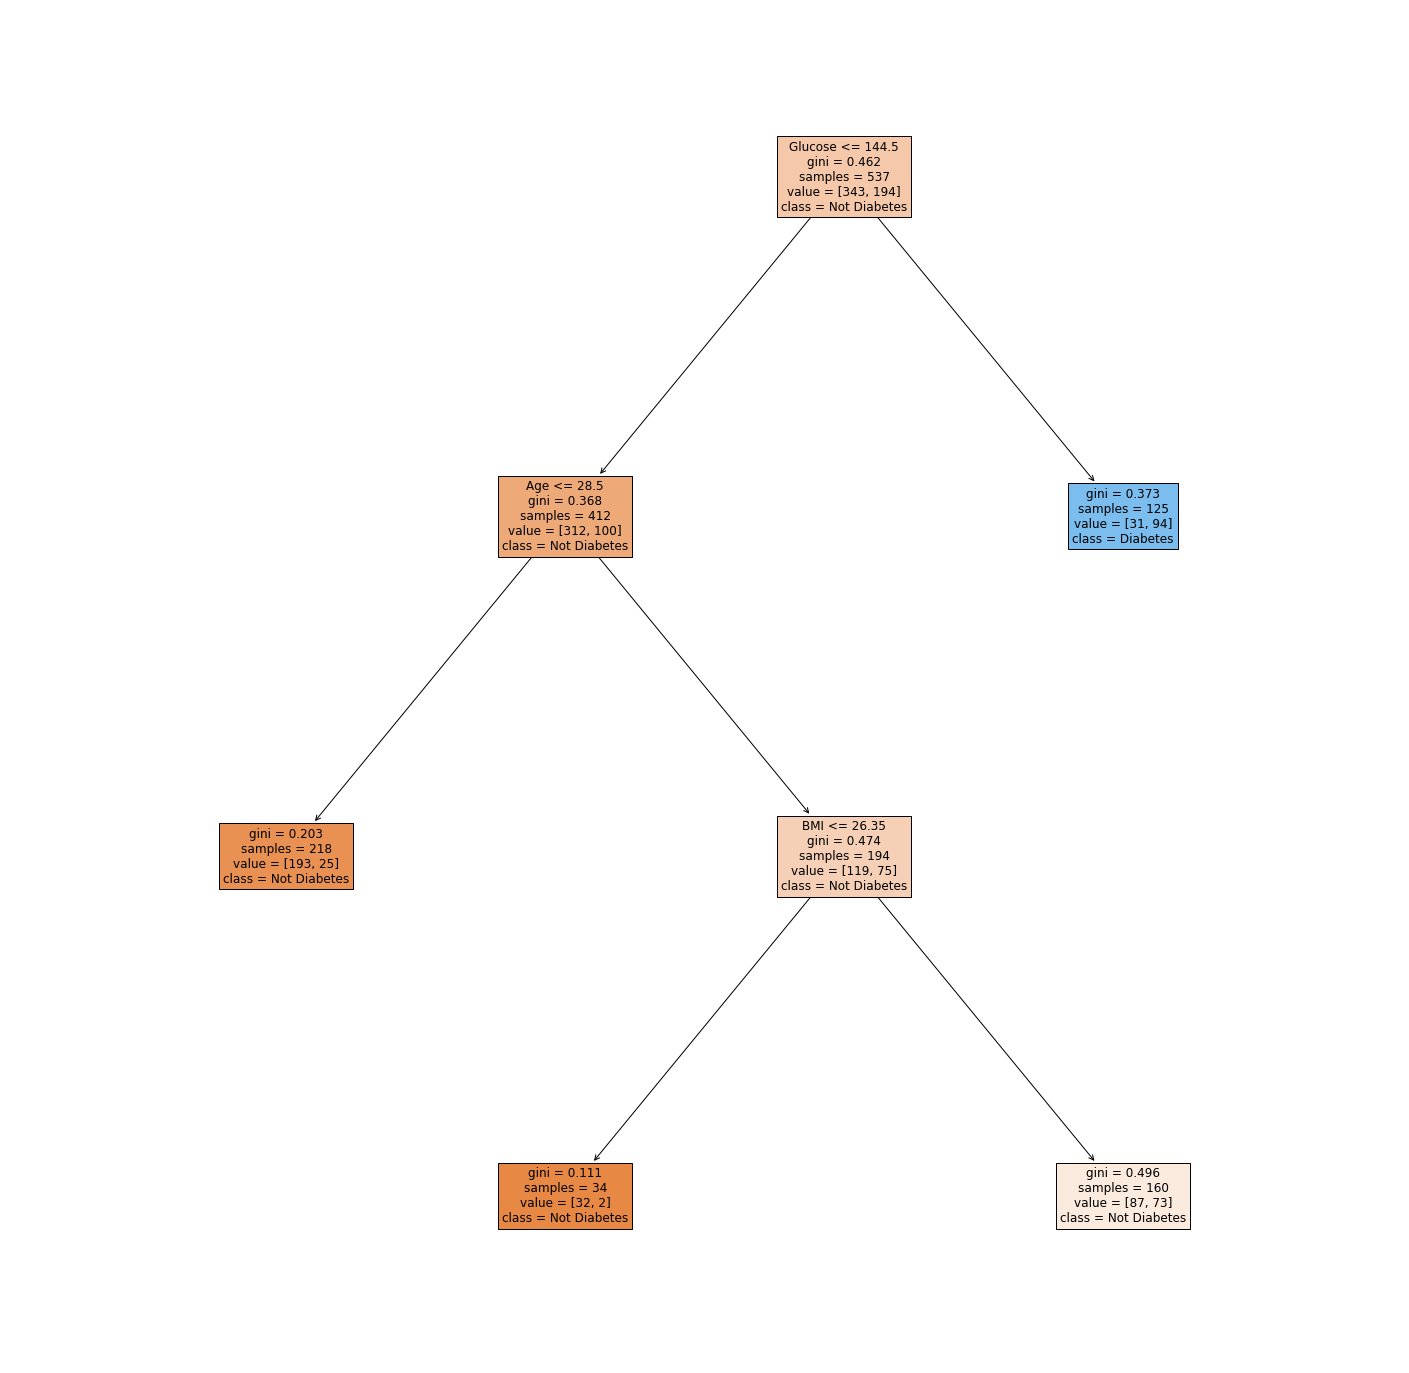

In [16]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure (figsize=(25,25))
_=tree.plot_tree(df_decision_tree, 
                   feature_names= feature_names,
                  class_names={0: 'Not Diabetes',1: 'Diabetes'},
                   filled=True,
                   fontsize=12)

In [84]:
df_decision_tree.predict([[6,148,72,35,0,33.6,0.627,50]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# Random Forest Classification

In [85]:
from sklearn import ensemble
R_forest = ensemble.RandomForestClassifier(n_estimators=100)
R_forest.fit(X_train,Y_train)
R_forest.score(X_test,Y_test)

0.7662337662337663

In [86]:
y_pred = R_forest.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[140,  17],
       [ 37,  37]], dtype=int64)

In [87]:
R_forest.predict([[6,148,72,35,0,33.6,0.627,50]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# Gradient Boost Classification

In [21]:
Grad_B = ensemble.GradientBoostingClassifier()
Grad_B.fit(X_train,Y_train)
Grad_B.score(X_test,Y_test)

0.7792207792207793

In [22]:
Grad_B.predict([[6,148,72,35,0,33.6,0.627,50]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# Naive Bayes Classification

In [88]:
from sklearn.naive_bayes import GaussianNB
Naive_B = GaussianNB()
Naive_B.fit(X_train,Y_train)
Naive_B.score(X_test,Y_test)

0.7316017316017316

In [89]:
y_pred = Naive_B.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[131,  26],
       [ 36,  38]], dtype=int64)

In [29]:
Naive_B.predict([[6,148,72,35,0,33.6,0.627,50]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# KNN Classification

In [90]:
from sklearn.neighbors import KNeighborsClassifier
K_Nearest_N = KNeighborsClassifier(n_neighbors=3)
K_Nearest_N.fit(X_train,Y_train)
K_Nearest_N.score(X_test,Y_test)

0.6926406926406926

In [91]:
y_pred = K_Nearest_N.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[123,  34],
       [ 37,  37]], dtype=int64)

In [92]:
K_Nearest_N.predict([[6,148,72,35,0,33.6,0.627,50]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# Logistic Regression Classification

In [27]:
from sklearn.linear_model import LogisticRegression
Logistic_R = LogisticRegression()
Logistic_R.fit(X_train,Y_train)
Logistic_R.score(X_test,Y_test)

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7792207792207793

In [28]:
y_pred = Logistic_R.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[141,  16],
       [ 35,  39]], dtype=int64)

In [31]:
Logistic_R.predict([[6,148,72,35,0,33.6,0.627,50]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# Kesimpulan

Berdasarkan **EDA** dari Data Diabetes didapat beberapa kesimpulan yaitu:
- 1. banyak pasien yang mempunyai **Glukosa, Blood Pressure, Skin Thickness, Insulin,** serta **Riwayat Diabetes diatas normal**
- 2. Banyak BMI pasien berada diatas 25, dan itu **tidak baik.**
- 3. Rata-rata umur penderita diabetes adalah 36 tahun
- 4. Rata-rata BMI penderita diabetes adalah 37
- 5. Total pasien penderita diabetes adalah 268 dari 767
- 6. Faktor yang paling mempengaruhi diabetes adalah **Glukosa, Umur, dan BMI**. Oleh karena itu kita harus menjaga tubuh kita dengan cara **berolahraga** serta **gaya hidup yang sehat**.